In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [47]:
size_points = 50
media_point = np.array([0, 3])
radius_point = 2

# Generate random points using Gaussian (normal) distribution
# Standard deviation controls the spread (using radius/2 as a reasonable default)
std_dev_position = radius_point / 2

# Generate x and y coordinates directly from normal distributions
random_x = np.random.normal(media_point[0], std_dev_position, size_points)
random_y = np.random.normal(media_point[1], std_dev_position, size_points)

# Parameters for normal distribution of DIRECTION angles
median_angle = np.pi  # Median angle (e.g., π = left direction)
std_dev_angle = np.pi / 8  # Standard deviation (e.g., π/4 = 45 degrees)

# Generate random theta values for DIRECTION using normal distribution
random_theta = np.random.normal(median_angle, std_dev_angle, size_points)

# Combine into array of points (x, y, theta)
random_points = np.column_stack((random_x, random_y, random_theta))

print(f"Generated {size_points} random points with Gaussian distribution")
print(f"Center: {media_point}, Std Dev: {std_dev_position:.3f}")
print(f"Direction angles - Mean: {median_angle:.3f}, Std Dev: {std_dev_angle:.3f}")


Generated 50 random points with Gaussian distribution
Center: [0 3], Std Dev: 1.000
Direction angles - Mean: 3.142, Std Dev: 0.393


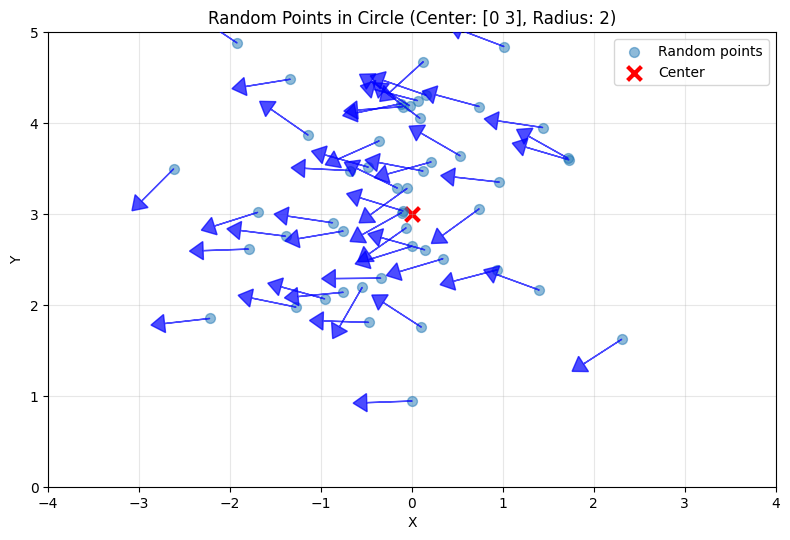

In [48]:
# Control axis limits
x_min, x_max = -4, 4
y_min, y_max = -0, 5

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], alpha=0.5, s=50, label='Random points', zorder=3)

# Plot direction arrows for each point
arrow_length = 0.5
for i in range(len(random_points)):
    x, y, theta = random_points[i]
    dx = arrow_length * np.cos(theta)
    dy = arrow_length * np.sin(theta)
    ax.arrow(x, y, dx, dy, head_width=0.2, head_length=0.15, fc='blue', ec='blue', alpha=0.7, zorder=4)

# Plot center point
ax.scatter(media_point[0], media_point[1], color='red', s=100, marker='x', linewidths=3, label='Center')

# # Draw circle boundary
# circle = plt.Circle((media_point[0], media_point[1]), radius_point, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
# ax.add_patch(circle)

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Random Points in Circle (Center: {media_point}, Radius: {radius_point})')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


In [49]:
def generate_random_points_in_circle(media, size, radius, median_angle=np.pi, std_dev_angle=np.pi/4):
    """
    Generate random points using Gaussian distribution with direction angles.
    
    Parameters:
    - media: center point [x, y]
    - size: number of points to generate
    - radius: radius parameter (used to calculate std deviation: radius/2)
    - median_angle: mean direction angle (default: π = left)
    - std_dev_angle: standard deviation of direction angles (default: π/4 = 45°)
    
    Returns:
    - points: array of shape (size, 3) with (x, y, theta) positions
    """
    # Generate random points using Gaussian (normal) distribution
    # Standard deviation is radius/2 to keep most points within the radius
    std_dev_position = radius / 2
    
    # Generate x and y coordinates directly from normal distributions
    random_x = np.random.normal(media[0], std_dev_position, size)
    random_y = np.random.normal(media[1], std_dev_position, size)
    
    # Generate direction angles using normal distribution
    theta_directions = np.random.normal(median_angle, std_dev_angle, size)

    points = np.column_stack((random_x, random_y, theta_directions))
    
    return points

def plot_points_in_circle(points, media, radius, x_range=None, y_range=None, show_circle=False, 
                         show_arrows=False, arrow_length=0.5, fig=None, ax=None):
    """
    Plot points in a circle with optional direction arrows.
    
    Parameters:
    - points: array of (x, y, theta) positions
    - media: center point [x, y]
    - radius: radius of the circle
    - x_range: optional tuple (x_min, x_max)
    - y_range: optional tuple (y_min, y_max)
    - show_circle: whether to show circle boundary
    - show_arrows: whether to show direction arrows
    - arrow_length: length of direction arrows
    - fig: optional existing figure (if None, creates new one)
    - ax: optional existing axes (if None, creates new one)
    
    Returns:
    - fig, ax: the figure and axes used for plotting
    """
    # Create new figure/axes if not provided
    created_new = False
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
        created_new = True
    
    ax.scatter(points[:, 0], points[:, 1], alpha=0.5, s=10, label='Points')
    ax.scatter(media[0], media[1], color='red', s=100, marker='x', linewidths=3, label='Center')
    
    # Plot direction arrows if requested
    if show_arrows:
        for i, point in enumerate(points):
            theta = point[2]
            dx = arrow_length * np.cos(theta)
            dy = arrow_length * np.sin(theta)
            ax.arrow(point[0], point[1], dx, dy, 
                    head_width=0.2, head_length=0.15, 
                    fc='blue', ec='blue', alpha=0.6, linewidth=1.5)
    
    if show_circle:
        circle = plt.Circle((media[0], media[1]), radius, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
        ax.add_patch(circle)
    
    if x_range is None:
        x_min, x_max = media[0] - radius - 1, media[0] + radius + 1
    else:
        x_min, x_max = x_range
    
    if y_range is None:
        y_min, y_max = media[1] - radius - 1, media[1] + radius + 1
    else:
        y_min, y_max = y_range
    
    
    # Only set labels, title, grid, and legend if we created a new figure
    if created_new:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        title = f'Random Points in Circle (Center: {media}, Radius: {radius})'
        if show_arrows:
            title += ' with Directions'
        ax.set_title(title)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # Only show if we created a new figure
    if created_new:
        plt.tight_layout()
        # Save the figure before showing
        filename = f'random_points_circle_{int(media[0])}_{int(media[1])}_r{int(radius)}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {filename}")
        plt.show()
    
    return fig, ax

def generate_spline_path(start_point, spline_points, target_point, num_points=300):
    
    path_points = np.vstack([start_point, spline_points, target_point])
    
    t = np.arange(len(path_points))
    
    cs_x = CubicSpline(t, path_points[:, 0])
    cs_y = CubicSpline(t, path_points[:, 1])
    
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points

Generated 40 points
Center: [2 5], Radius: 4
Points shape: (40, 3)
Direction angles - Mean: 3.142, Std Dev: 0.314

First 5 points:
[[3.8349511  2.79144837 3.04777376]
 [3.2866792  8.41855087 3.33215225]
 [3.4404364  3.6605825  2.70753485]
 [3.31033476 3.997458   2.96249245]
 [2.22519792 8.24939736 2.89729042]]
Plot saved as: random_points_circle_2_5_r4.png


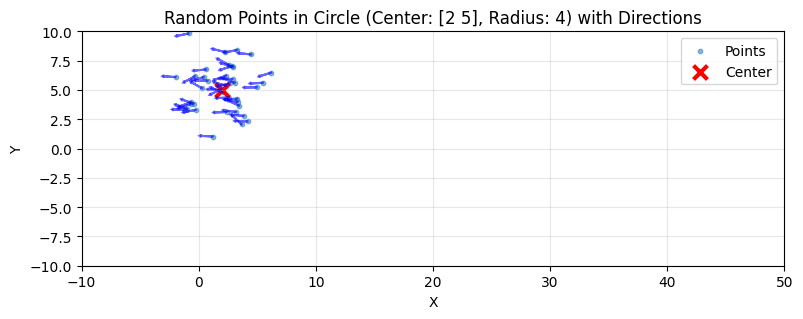

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Random Points in Circle (Center: [2 5], Radius: 4) with Directions'}, xlabel='X', ylabel='Y'>)

In [50]:
# Test the functions
test_media = np.array([2, 5])
test_size = 40
test_radius = 4
test_median_angle = np.pi  # pointing left
test_std_dev_angle = np.pi / 10  # 45 degrees spread

test_points = generate_random_points_in_circle(
    test_media, test_size, test_radius, test_median_angle, test_std_dev_angle
)

print(f"Generated {test_size} points")
print(f"Center: {test_media}, Radius: {test_radius}")
print(f"Points shape: {test_points.shape}")
print(f"Direction angles - Mean: {test_median_angle:.3f}, Std Dev: {test_std_dev_angle:.3f}")
print(f"\nFirst 5 points:\n{test_points[:5]}")

plot_points_in_circle(
    test_points, test_media, test_radius, 
    x_range=(-10, 50), y_range=(-10, 10),
    show_arrows=True,
    show_circle=False,
    arrow_length=1.0
)


Generated 50 points
Center: [2 5], Radius: 4
Points shape: (50, 3)
Direction angles - Mean: 3.142, Std Dev: 0.314

First 5 points:
[[ 2.68706936  5.95325371  3.97881896]
 [-0.42525565  7.77556418  2.74366273]
 [ 3.08247169  6.35203816  3.2774507 ]
 [ 2.4500917   4.70840814  3.35077498]
 [ 1.10740484  1.83825891  3.3821056 ]]
Plot saved as: random_points_circle_2_5_r4.png


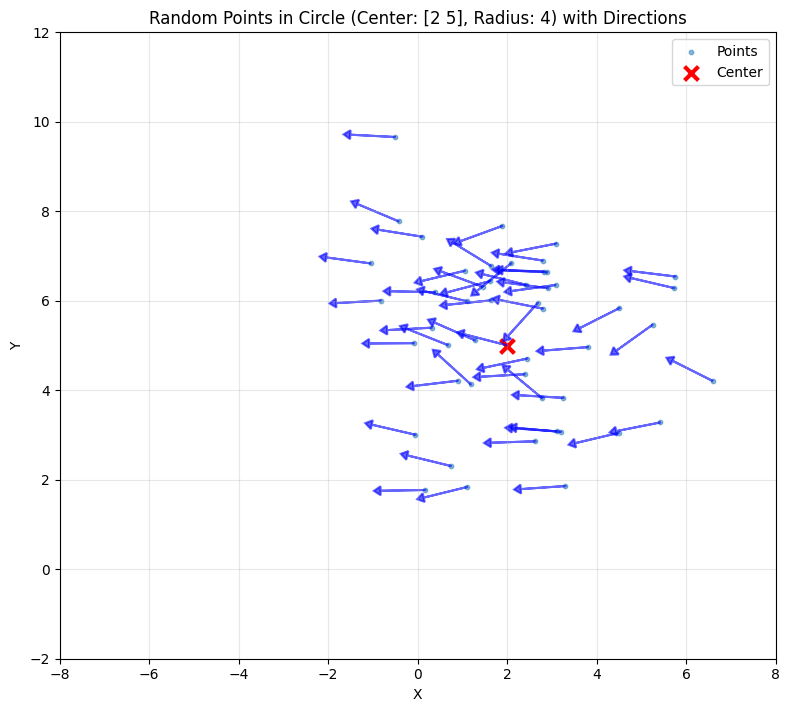

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Random Points in Circle (Center: [2 5], Radius: 4) with Directions'}, xlabel='X', ylabel='Y'>)

In [51]:
# Test the functions
test_media = np.array([2, 5])
test_size = 50
test_radius = 4
test_median_angle = np.pi  # pointing left
test_std_dev_angle = np.pi / 10  # 45 degrees spread

test_points = generate_random_points_in_circle(
    test_media, test_size, test_radius, test_median_angle, test_std_dev_angle
)

print(f"Generated {test_size} points")
print(f"Center: {test_media}, Radius: {test_radius}")
print(f"Points shape: {test_points.shape}")
print(f"Direction angles - Mean: {test_median_angle:.3f}, Std Dev: {test_std_dev_angle:.3f}")
print(f"\nFirst 5 points:\n{test_points[:5]}")

plot_points_in_circle(
    test_points, test_media, test_radius, 
    x_range=[-8, 8], y_range=[-2, 12],
    show_arrows=True,
    show_circle=False,
    arrow_length=1.0
)


# Path generation

Plot saved as: example_spline_path_with_directions.png


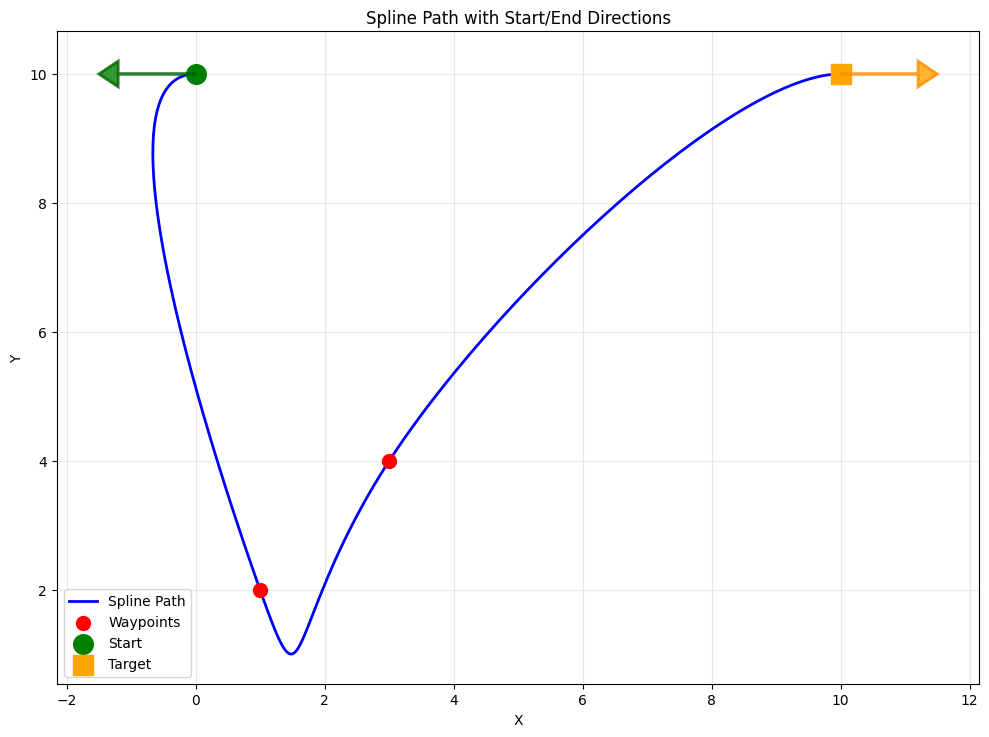

Start point (x, y, theta): (0, 10, 3.142)
Target point (x, y, theta): (10, 10, 0.000)
Waypoints (no direction): 2 points
Path respects start and end tangent directions


In [52]:
start_point = np.array([0, 10])
spline_points = np.array([[1, 2], [3, 4]])
target_point = np.array([10, 10])

start_theta = np.pi  # radians (0 = right, π/2 = up, π = left, 3π/2 = down)
target_theta = 0.0 * np.pi  # radians

# Start point with direction
start_point_with_dir = np.array([start_point[0], start_point[1], start_theta])
# Target point with direction
target_point_with_dir = np.array([target_point[0], target_point[1], target_theta])

# Spline points remain as waypoints (no direction)
# spline_points already defined from previous cell

# Create cubic spline with derivatives to respect start and end directions
# Calculate desired derivatives from theta - these are the tangent directions
# Increase magnitude to enforce direction more strongly
derivative_magnitude = 5.0  # Adjust this to control how strongly the direction is enforced
start_derivative = derivative_magnitude * np.array([np.cos(start_theta), np.sin(start_theta)])
target_derivative = derivative_magnitude * np.array([np.cos(target_theta), np.sin(target_theta)])

# Combine all points for the path: start -> spline_points -> target
path_control_points = np.vstack([start_point, spline_points, target_point])

# Create parameter t for interpolation
t = np.arange(len(path_control_points))

# Create cubic spline with boundary conditions for derivatives
# bc_type=((1, derivative), (1, derivative)) sets first derivative at start and end
cs_x = CubicSpline(t, path_control_points[:, 0], bc_type=((1, start_derivative[0]), (1, target_derivative[0])))
cs_y = CubicSpline(t, path_control_points[:, 1], bc_type=((1, start_derivative[1]), (1, target_derivative[1])))

# Generate smooth path with more points
t_smooth = np.linspace(0, len(path_control_points) - 1, 300)
smooth_path_x = cs_x(t_smooth)
smooth_path_y = cs_y(t_smooth)
smooth_path_with_dir = np.column_stack((smooth_path_x, smooth_path_y))

# Plot the spline path with theta directions
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the smooth spline path
ax.plot(smooth_path_with_dir[:, 0], smooth_path_with_dir[:, 1], 'b-', linewidth=2, label='Spline Path')

# Plot direction arrows only for start and target points
arrow_length = 1.2
# Start point arrow
dx_start = arrow_length * np.cos(start_theta)
dy_start = arrow_length * np.sin(start_theta)
ax.arrow(start_point[0], start_point[1], dx_start, dy_start, head_width=0.4, head_length=0.3, fc='green', ec='darkgreen', alpha=0.8, zorder=7, linewidth=2)

# Target point arrow
dx_target = arrow_length * np.cos(target_theta)
dy_target = arrow_length * np.sin(target_theta)
ax.arrow(target_point[0], target_point[1], dx_target, dy_target, head_width=0.4, head_length=0.3, fc='orange', ec='darkorange', alpha=0.8, zorder=7, linewidth=2)

# Plot control points (waypoints - no direction)
ax.scatter(spline_points[:, 0], spline_points[:, 1], color='red', s=100, zorder=5, label='Waypoints')

# Highlight start and target points
ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Spline Path with Start/End Directions')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
# Save the figure before showing
filename = 'example_spline_path_with_directions.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot saved as: {filename}")
plt.show()

print(f"Start point (x, y, theta): ({start_point[0]}, {start_point[1]}, {start_theta:.3f})")
print(f"Target point (x, y, theta): ({target_point[0]}, {target_point[1]}, {target_theta:.3f})")
print(f"Waypoints (no direction): {len(spline_points)} points")
print(f"Path respects start and end tangent directions")


In [53]:

def generate_spline_path(start_point, spline_points, target_point, num_points=300, derivative_magnitude=5.0):
    """
    Generate a smooth spline path through control points.
    
    Parameters:
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - spline_points: array of intermediate waypoints [[x1, y1], [x2, y2], ...]
    - target_point: target point [x, y, theta] - MUST have 3 components
    - num_points: number of points in the smooth path
    - derivative_magnitude: magnitude to enforce direction (higher = stronger enforcement)
    
    Returns:
    - smooth_path: array of smooth path points
    - path_points: array of control points used
    """
    
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    # Extract x, y coordinates
    start_xy = start_point[:2]
    target_xy = target_point[:2]
    
    # Combine all points for the path: start -> spline_points -> target
    path_points = np.vstack([start_xy, spline_points, target_xy])
    
    # Create parameter t for interpolation (distance along the path)
    t = np.arange(len(path_points))
    
    # Calculate derivatives from theta angles (ALWAYS present)
    start_derivative = derivative_magnitude * np.array([np.cos(start_theta), np.sin(start_theta)])
    target_derivative = derivative_magnitude * np.array([np.cos(target_theta), np.sin(target_theta)])
    
    # Create cubic spline with boundary conditions for derivatives
    bc_type_x = ((1, start_derivative[0]), (1, target_derivative[0]))
    bc_type_y = ((1, start_derivative[1]), (1, target_derivative[1]))
    
    cs_x = CubicSpline(t, path_points[:, 0], bc_type=bc_type_x)
    cs_y = CubicSpline(t, path_points[:, 1], bc_type=bc_type_y)
    
    # Generate smooth path with more points
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    # Combine into array of path points
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points


def plot_spline_path(smooth_path, control_points, start_point, target_point, arrow_length=1.2):
    """
    Plot a spline path with direction arrows.
    
    Parameters:
    - smooth_path: array of path points
    - control_points: array of control points
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - target_point: target point [x, y, theta] - MUST have 3 components
    - arrow_length: length of direction arrows
    """
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the smooth spline path
    ax.plot(smooth_path[:, 0], smooth_path[:, 1], 'b-', linewidth=2, label='Spline Path')
    
    # Plot direction arrows
    dx_start = arrow_length * np.cos(start_theta)
    dy_start = arrow_length * np.sin(start_theta)
    ax.arrow(start_point[0], start_point[1], dx_start, dy_start, 
            head_width=0.4, head_length=0.3, fc='green', ec='darkgreen', 
            alpha=0.8, zorder=7, linewidth=2)
    
    dx_target = arrow_length * np.cos(target_theta)
    dy_target = arrow_length * np.sin(target_theta)
    ax.arrow(target_point[0], target_point[1], dx_target, dy_target, 
            head_width=0.4, head_length=0.3, fc='orange', ec='darkorange', 
            alpha=0.8, zorder=7, linewidth=2)
    
    # Plot control points (waypoints - no direction)
    ax.scatter(control_points[:, 0], control_points[:, 1], color='red', s=100, zorder=5, label='Waypoints')
    
    # Highlight start and target points
    ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
    ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Spline Path with Start/End Directions')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    # Save the figure before showing
    filename = f'spline_path_{int(start_point[0])}_{int(start_point[1])}_{int(target_point[0])}_{int(target_point[1])}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved as: {filename}")
    plt.show()

Plot saved as: spline_path_0_0_12_3.png


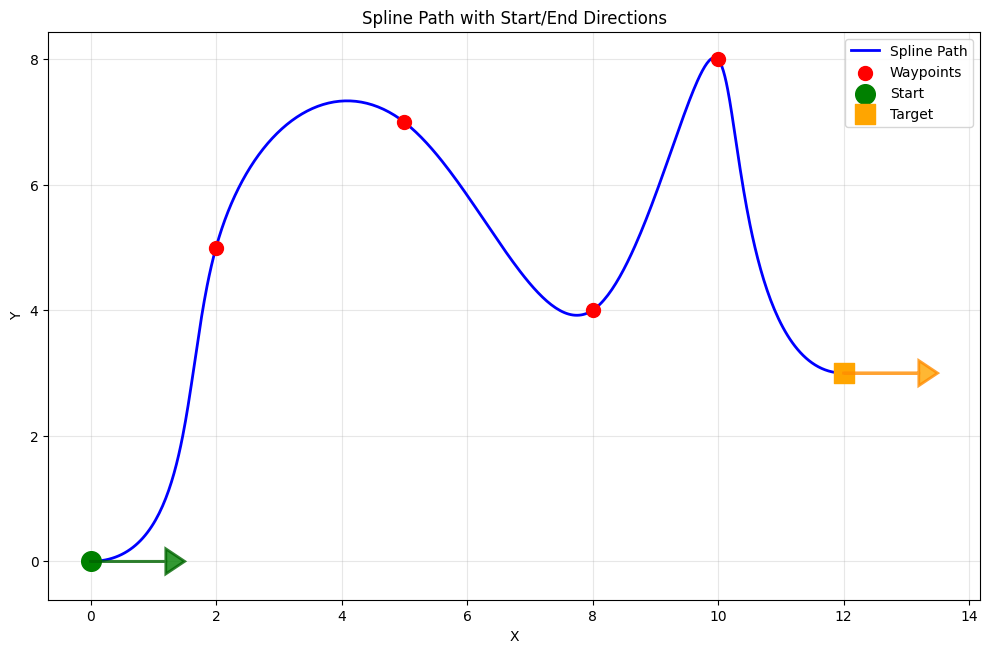

Path created with 6 control points
Smooth path generated with 400 points
Start point (x, y, theta): (0.0, 0.0, 0.000)
Target point (x, y, theta): (12.0, 3.0, 0.000)
Waypoints (no direction): 4 points
Path respects start and end tangent directions


In [54]:
# Test the updated functions with [x, y, theta] format
# Define start and target with direction angles
test_start = np.array([0, 0, 0.0 * np.pi])  # [x, y, theta] - pointing down-right
test_target = np.array([12, 3, 0.0 * np.pi])  # [x, y, theta] - pointing right

# Waypoints remain as [x, y] only
test_spline = np.array([[2, 5], [5, 7], [8, 4], [10, 8]])

# Generate spline path - theta will be extracted automatically
smooth_path, control_points = generate_spline_path(
    test_start, test_spline, test_target, 
    num_points=400,
    derivative_magnitude=5.0
)

# Plot the path - theta will be extracted automatically
plot_spline_path(smooth_path, control_points, test_start, test_target, arrow_length=1.2)

# Print results
print(f"Path created with {len(control_points)} control points")
print(f"Smooth path generated with {len(smooth_path)} points")
print(f"Start point (x, y, theta): ({test_start[0]}, {test_start[1]}, {test_start[2]:.3f})")
print(f"Target point (x, y, theta): ({test_target[0]}, {test_target[1]}, {test_target[2]:.3f})")
print(f"Waypoints (no direction): {len(test_spline)} points")
print(f"Path respects start and end tangent directions")


# Random points + Paths

Plot saved as: multiple_paths_random_starts_20points.png


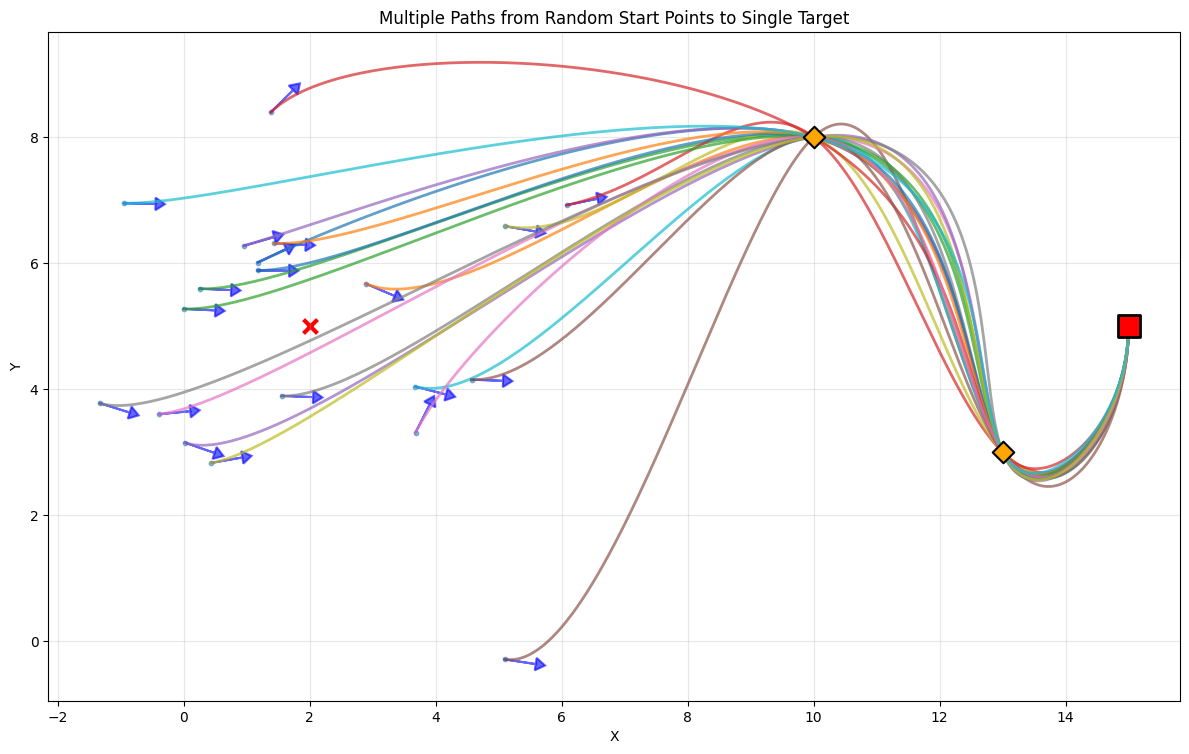

Each path uses 2 spline control points


In [55]:
# Test the functions
media_points = np.array([2, 5])
size_points = 20
radius_for_points = 4
median_angle = 0.0  # pointing left
std_dev_angle = np.pi / 10  # 45 degrees spread

start_points = generate_random_points_in_circle(
    media_points, size_points, radius_for_points, median_angle, std_dev_angle
)

# Define single target point
target_point = np.array([15, 5, 0.5*np.pi])

# # Define two spline control points (same for all paths)
spline_control_points = np.array([[10, 8], [13, 3]])

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    smooth_path, control_pts = generate_spline_path(
        start_pt, spline_control_points, target_point, 
        num_points=400,
        derivative_magnitude=5.0
    )
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7)

# Plot start points
# ax.scatter(start_points[:, 0], start_points[:, 1], color='green', s=150, zorder=5, edgecolors='black', linewidths=2, label='Start Points')

# # # Plot target point
plot_points_in_circle(start_points, media_points, radius_for_points, x_range=None, y_range=None, show_circle=False, 
                         show_arrows=True, arrow_length=0.5, fig=fig, ax=ax)
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', zorder=6, edgecolors='black', linewidths=2, label='Target')

# Plot spline control points
ax.scatter(spline_control_points[:, 0], spline_control_points[:, 1], color='orange', s=120, marker='D', zorder=5, edgecolors='black', linewidths=1.5, label='Spline Points')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Multiple Paths from Random Start Points to Single Target')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
# ax.legend(loc='upper left')

plt.tight_layout()
# Save the figure before showing
filename = f'multiple_paths_random_starts_{size_points}points.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot saved as: {filename}")
plt.show()

print(f"Each path uses {len(spline_control_points)} spline control points")


Plot saved as: multiple_paths_10starts_2pools.png


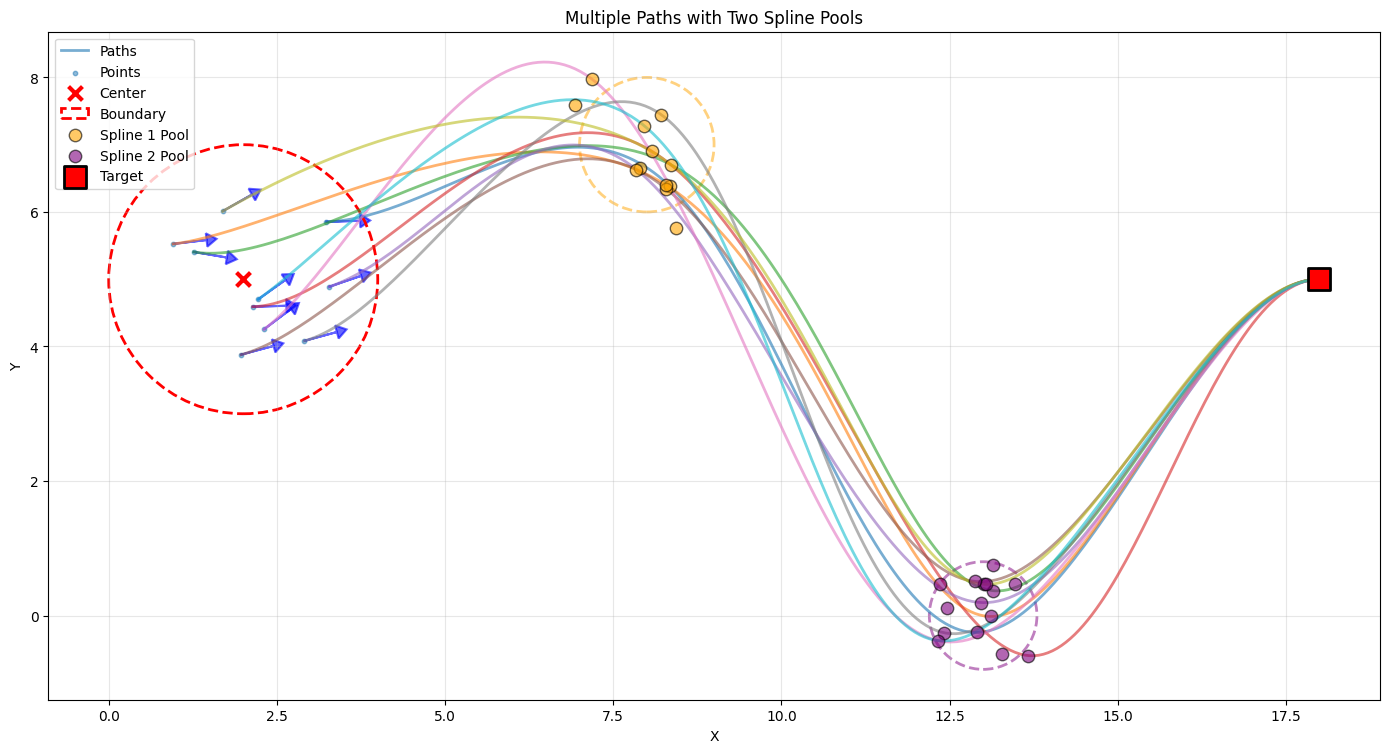

Generated 10 paths
Start points: 10 points with theta
Spline 1 pool: 12 waypoints (x, y only)
Spline 2 pool: 15 waypoints (x, y only)
Target point: [x, y, theta]
Each path randomly selects 1 waypoint from Spline 1 pool, then 1 from Spline 2 pool


In [56]:
# CORRECTED: Generate random start points with direction angles
start_center = np.array([2, 5])
start_radius = 2
num_start_points = 10
median_angle_start = 0.0 * np.pi  # pointing right
std_dev_angle_start = np.pi / 6  # 30 degrees spread

start_points = generate_random_points_in_circle(start_center, num_start_points, start_radius, 
                                                median_angle_start, std_dev_angle_start)

# Generate first spline pool (waypoints - extract only x, y)
spline1_center = np.array([8, 7])
spline1_radius = 1
num_spline1_points = 12

spline1_pool_full = generate_random_points_in_circle(spline1_center, num_spline1_points, spline1_radius)
spline1_pool = spline1_pool_full[:, :2]  # Extract only [x, y] - waypoints don't need theta

# Generate second spline pool (waypoints - extract only x, y)
spline2_center = np.array([13, 0])
spline2_radius = 0.8
num_spline2_points = 15

spline2_pool_full = generate_random_points_in_circle(spline2_center, num_spline2_points, spline2_radius)
spline2_pool = spline2_pool_full[:, :2]  # Extract only [x, y] - waypoints don't need theta

# Define single target point WITH theta [x, y, theta]
target_point = np.array([18, 5, 0.0 * np.pi])  # pointing right

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    # Randomly select one point from first spline pool
    spline1_idx = np.random.randint(0, num_spline1_points)
    spline1_point = spline1_pool[spline1_idx]  # [x, y] waypoint
    
    # Randomly select one point from second spline pool
    spline2_idx = np.random.randint(0, num_spline2_points)
    spline2_point = spline2_pool[spline2_idx]  # [x, y] waypoint
    
    # Combine the two spline points in order
    selected_splines = np.array([spline1_point, spline2_point])
    
    # start_pt: [x, y, theta], selected_splines: [[x, y], [x, y]], target_point: [x, y, theta]
    smooth_path, control_pts = generate_spline_path(start_pt, selected_splines, target_point, num_points=200)
    
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6)

# Use plot_points_in_circle to show start points with arrows
plot_points_in_circle(start_points, start_center, start_radius, 
                     show_circle=True, show_arrows=True, arrow_length=0.5, 
                     fig=fig, ax=ax)

# Plot first spline pool (waypoints - no arrows needed)
circle_spline1 = plt.Circle((spline1_center[0], spline1_center[1]), spline1_radius, 
                           color='orange', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline1)
ax.scatter(spline1_pool[:, 0], spline1_pool[:, 1], color='orange', s=80, alpha=0.6, 
          zorder=4, edgecolors='black', linewidths=1, label='Spline 1 Pool')

# Plot second spline pool (waypoints - no arrows needed)
circle_spline2 = plt.Circle((spline2_center[0], spline2_center[1]), spline2_radius, 
                           color='purple', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline2)
ax.scatter(spline2_pool[:, 0], spline2_pool[:, 1], color='purple', s=80, alpha=0.6, 
          zorder=4, edgecolors='black', linewidths=1, label='Spline 2 Pool')

# Plot target point
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', 
          zorder=6, edgecolors='black', linewidths=2, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multiple Paths with Two Spline Pools')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
# Save the figure before showing
filename = f'multiple_paths_{num_start_points}starts_2pools.png'
fig.savefig(filename, dpi=300, bbox_inches='tight')
print(f"Plot saved as: {filename}")
plt.show()

print(f"Generated {num_start_points} paths")
print(f"Start points: {num_start_points} points with theta")
print(f"Spline 1 pool: {num_spline1_points} waypoints (x, y only)")
print(f"Spline 2 pool: {num_spline2_points} waypoints (x, y only)")
print(f"Target point: [x, y, theta]")
print(f"Each path randomly selects 1 waypoint from Spline 1 pool, then 1 from Spline 2 pool")


# Modified Band Depth (MBD) Analysis

Modified Band Depth es una técnica de análisis funcional que mide cuán "central" es una curva dentro de un conjunto de trayectorias. Una trayectoria con mayor MBD es más representativa del conjunto.


In [ ]:
def interpolate_trajectory(trajectory, num_points=100):
    """
    Interpola una trayectoria a un número fijo de puntos igualmente espaciados.
    
    Parameters:
    - trajectory: array de forma (n, 2) con puntos [x, y]
    - num_points: número de puntos en la trayectoria interpolada
    
    Returns:
    - interpolated: array de forma (num_points, 2) con puntos interpolados
    """
    n = len(trajectory)
    if n < 2:
        raise ValueError("Trajectory must have at least 2 points")
    
    # Parámetro original basado en distancia acumulada
    distances = np.sqrt(np.sum(np.diff(trajectory, axis=0)**2, axis=1))
    cumulative_dist = np.concatenate(([0], np.cumsum(distances)))
    
    # Normalizar a [0, 1]
    if cumulative_dist[-1] == 0:
        cumulative_dist = np.linspace(0, 1, n)
    else:
        cumulative_dist = cumulative_dist / cumulative_dist[-1]
    
    # Parámetro de salida uniforme
    t_uniform = np.linspace(0, 1, num_points)
    
    # Interpolar x e y por separado
    x_interp = np.interp(t_uniform, cumulative_dist, trajectory[:, 0])
    y_interp = np.interp(t_uniform, cumulative_dist, trajectory[:, 1])
    
    interpolated = np.column_stack((x_interp, y_interp))
    return interpolated


def compute_band_depth_for_trajectory(traj_i, traj_j, traj_k):
    """
    Calcula la proporción de puntos de traj_i que caen dentro de la banda formada por traj_j y traj_k.
    
    Parameters:
    - traj_i: trayectoria a evaluar, array de forma (M, 2)
    - traj_j: primera trayectoria de referencia, array de forma (M, 2)
    - traj_k: segunda trayectoria de referencia, array de forma (M, 2)
    
    Returns:
    - proportion: proporción de puntos dentro de la banda (entre 0 y 1)
    """
    # Para cada coordenada (x, y), calcular banda [min, max] entre j y k
    band_min = np.minimum(traj_j, traj_k)  # (M, 2)
    band_max = np.maximum(traj_j, traj_k)  # (M, 2)
    
    # Verificar si cada punto de traj_i está dentro de la banda
    # Un punto está dentro si AMBAS coordenadas (x, y) están dentro de sus respectivas bandas
    inside_x = (traj_i[:, 0] >= band_min[:, 0]) & (traj_i[:, 0] <= band_max[:, 0])
    inside_y = (traj_i[:, 1] >= band_min[:, 1]) & (traj_i[:, 1] <= band_max[:, 1])
    inside_band = inside_x & inside_y
    
    # Proporción de puntos dentro de la banda
    proportion = np.mean(inside_band)
    return proportion


def compute_modified_band_depth(trajectories, num_points=100, sample_pairs=None):
    """
    Calcula Modified Band Depth (MBD) para cada trayectoria en el conjunto.
    
    Parameters:
    - trajectories: lista de arrays, cada uno de forma (n_i, 2)
    - num_points: número de puntos para discretización uniforme
    - sample_pairs: si es un entero, muestrea aleatoriamente ese número de pares (j,k)
                   en lugar de usar todos. None = usar todos los pares.
    
    Returns:
    - mbd_values: array de forma (n_trajectories,) con valores MBD
    - trajectories_interp: lista de trayectorias interpoladas
    """
    n_traj = len(trajectories)
    
    # Paso 1: Interpolar todas las trayectorias a M puntos
    print(f"Interpolating {n_traj} trajectories to {num_points} points each...")
    trajectories_interp = [interpolate_trajectory(traj, num_points) for traj in trajectories]
    trajectories_array = np.array(trajectories_interp)  # (n_traj, num_points, 2)
    
    # Paso 2: Generar todos los pares (j, k) con j < k
    all_pairs = [(j, k) for j in range(n_traj) for k in range(j+1, n_traj)]
    n_pairs = len(all_pairs)
    
    # Muestrear pares si se especifica
    if sample_pairs is not None and sample_pairs < n_pairs:
        print(f"Sampling {sample_pairs} random pairs out of {n_pairs} total pairs...")
        indices = np.random.choice(n_pairs, size=sample_pairs, replace=False)
        pairs_to_use = [all_pairs[i] for i in indices]
    else:
        pairs_to_use = all_pairs
        print(f"Using all {n_pairs} pairs for MBD calculation...")
    
    # Paso 3: Calcular MBD para cada trayectoria
    mbd_values = np.zeros(n_traj)
    
    for i in range(n_traj):
        depth_sum = 0.0
        traj_i = trajectories_array[i]
        
        # Calcular proporción dentro de banda para cada par (j, k)
        for j, k in pairs_to_use:
            traj_j = trajectories_array[j]
            traj_k = trajectories_array[k]
            proportion = compute_band_depth_for_trajectory(traj_i, traj_j, traj_k)
            depth_sum += proportion
        
        # MBD es el promedio sobre todos los pares
        mbd_values[i] = depth_sum / len(pairs_to_use)
        
        if (i + 1) % max(1, n_traj // 10) == 0 or i == n_traj - 1:
            print(f"  Computed MBD for trajectory {i+1}/{n_traj}")
    
    return mbd_values, trajectories_interp


def plot_mbd_analysis(trajectories, mbd_values, title="Modified Band Depth Analysis"):
    """
    Visualiza el análisis de MBD: todas las trayectorias, la más central y la más extrema.
    
    Parameters:
    - trajectories: lista de arrays, cada uno de forma (n_i, 2)
    - mbd_values: array con valores MBD de cada trayectoria
    - title: título del gráfico
    """
    n_traj = len(trajectories)
    
    # Identificar trayectorias de interés
    idx_max_mbd = np.argmax(mbd_values)
    idx_min_mbd = np.argmin(mbd_values)
    
    max_mbd = mbd_values[idx_max_mbd]
    min_mbd = mbd_values[idx_min_mbd]
    mean_mbd = np.mean(mbd_values)
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Subplot 1: Todas las trayectorias con las destacadas
    # Plotear todas las trayectorias en gris claro
    for i, traj in enumerate(trajectories):
        ax1.plot(traj[:, 0], traj[:, 1], color='lightgray', linewidth=1, alpha=0.4, zorder=1)
    
    # Destacar la trayectoria con mayor MBD (más central)
    traj_max = trajectories[idx_max_mbd]
    ax1.plot(traj_max[:, 0], traj_max[:, 1], color='green', linewidth=3, 
            label=f'Max MBD = {max_mbd:.4f}', zorder=3)
    
    # Destacar la trayectoria con menor MBD (más extrema)
    traj_min = trajectories[idx_min_mbd]
    ax1.plot(traj_min[:, 0], traj_min[:, 1], color='red', linewidth=3, 
            label=f'Min MBD = {min_mbd:.4f}', zorder=2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'{title}\n({n_traj} trajectories)')
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    
    # Subplot 2: Histograma de valores MBD
    ax2.hist(mbd_values, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    ax2.axvline(max_mbd, color='green', linestyle='--', linewidth=2, label=f'Max: {max_mbd:.4f}')
    ax2.axvline(min_mbd, color='red', linestyle='--', linewidth=2, label=f'Min: {min_mbd:.4f}')
    ax2.axvline(mean_mbd, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_mbd:.4f}')
    ax2.set_xlabel('MBD Value')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of MBD Values')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.legend()
    
    plt.tight_layout()
    
    # Guardar figura
    filename = 'mbd_analysis.png'
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"\nPlot saved as: {filename}")
    plt.show()
    
    # Imprimir estadísticas
    print(f"\n{'='*50}")
    print(f"MBD Statistics:")
    print(f"{'='*50}")
    print(f"Number of trajectories: {n_traj}")
    print(f"Mean MBD: {mean_mbd:.4f}")
    print(f"Std MBD: {np.std(mbd_values):.4f}")
    print(f"Max MBD: {max_mbd:.4f} (trajectory #{idx_max_mbd})")
    print(f"Min MBD: {min_mbd:.4f} (trajectory #{idx_min_mbd})")
    print(f"{'='*50}")
    
    return idx_max_mbd, idx_min_mbd


## Ejemplo 1: MBD aplicado a trayectorias con puntos de inicio aleatorios


In [58]:
# Generar múltiples trayectorias desde puntos de inicio aleatorios
np.random.seed(42)  # Para reproducibilidad

media_points = np.array([2, 5])
size_points = 30
radius_for_points = 4
median_angle = 0.0
std_dev_angle = np.pi / 8

start_points = generate_random_points_in_circle(
    media_points, size_points, radius_for_points, median_angle, std_dev_angle
)

# Definir punto objetivo y puntos de control del spline
target_point = np.array([15, 5, 0.5*np.pi])
spline_control_points = np.array([[10, 8], [13, 3]])

# Generar todas las trayectorias
trajectories_list = []
for i, start_pt in enumerate(start_points):
    smooth_path, _ = generate_spline_path(
        start_pt, spline_control_points, target_point, 
        num_points=400,
        derivative_magnitude=5.0
    )
    trajectories_list.append(smooth_path)

print(f"Generated {len(trajectories_list)} trajectories")
print(f"Each trajectory has {len(trajectories_list[0])} points")


Generated 30 trajectories
Each trajectory has 400 points


In [59]:
# Calcular Modified Band Depth
mbd_values, trajectories_interp = compute_modified_band_depth(
    trajectories_list, 
    num_points=150,
    sample_pairs=None  # Usar todos los pares (para conjuntos grandes, usar ej. 1000)
)

print(f"\nMBD computed for {len(mbd_values)} trajectories")


Interpolating 30 trajectories to 150 points each...
Using all 435 pairs for MBD calculation...
  Computed MBD for trajectory 3/30
  Computed MBD for trajectory 6/30
  Computed MBD for trajectory 9/30
  Computed MBD for trajectory 12/30
  Computed MBD for trajectory 15/30
  Computed MBD for trajectory 18/30
  Computed MBD for trajectory 21/30
  Computed MBD for trajectory 24/30
  Computed MBD for trajectory 27/30
  Computed MBD for trajectory 30/30

MBD computed for 30 trajectories



Plot saved as: mbd_analysis.png


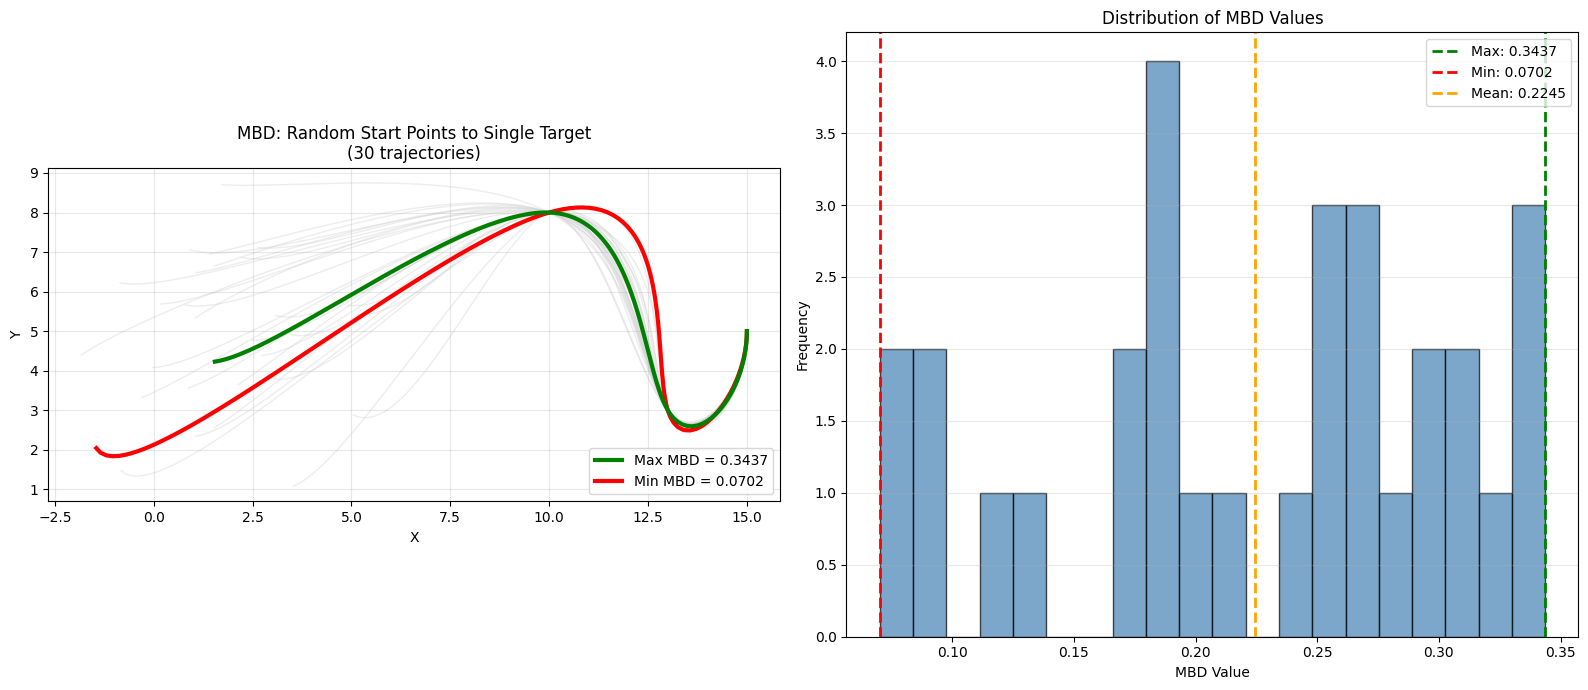


MBD Statistics:
Number of trajectories: 30
Mean MBD: 0.2245
Std MBD: 0.0815
Max MBD: 0.3437 (trajectory #21)
Min MBD: 0.0702 (trajectory #14)


In [60]:
# Visualizar resultados del análisis MBD
idx_max, idx_min = plot_mbd_analysis(
    trajectories_interp, 
    mbd_values, 
    title="MBD: Random Start Points to Single Target"
)


## Ejemplo 2: MBD aplicado a trayectorias con pools de puntos de control


In [61]:
# Generar trayectorias con variabilidad en los puntos de control
np.random.seed(100)  # Para reproducibilidad

# Generar puntos de inicio
start_center = np.array([2, 5])
start_radius = 2
num_start_points = 25
median_angle_start = 0.0 * np.pi
std_dev_angle_start = np.pi / 6

start_points_pool = generate_random_points_in_circle(
    start_center, num_start_points, start_radius, 
    median_angle_start, std_dev_angle_start
)

# Generar pools de puntos de control
spline1_center = np.array([8, 7])
spline1_radius = 1.5
num_spline1_points = 20
spline1_pool_full = generate_random_points_in_circle(spline1_center, num_spline1_points, spline1_radius)
spline1_pool = spline1_pool_full[:, :2]

spline2_center = np.array([13, 0])
spline2_radius = 1.2
num_spline2_points = 20
spline2_pool_full = generate_random_points_in_circle(spline2_center, num_spline2_points, spline2_radius)
spline2_pool = spline2_pool_full[:, :2]

# Punto objetivo
target_point_pool = np.array([18, 5, 0.0 * np.pi])

# Generar trayectorias con selección aleatoria de puntos de control
trajectories_pool_list = []
for i, start_pt in enumerate(start_points_pool):
    spline1_idx = np.random.randint(0, num_spline1_points)
    spline1_point = spline1_pool[spline1_idx]
    
    spline2_idx = np.random.randint(0, num_spline2_points)
    spline2_point = spline2_pool[spline2_idx]
    
    selected_splines = np.array([spline1_point, spline2_point])
    
    smooth_path, _ = generate_spline_path(
        start_pt, selected_splines, target_point_pool, 
        num_points=300,
        derivative_magnitude=5.0
    )
    trajectories_pool_list.append(smooth_path)

print(f"Generated {len(trajectories_pool_list)} trajectories with random control points")
print(f"Each trajectory has {len(trajectories_pool_list[0])} points")


Generated 25 trajectories with random control points
Each trajectory has 300 points


In [62]:
# Calcular Modified Band Depth para el segundo conjunto
mbd_values_pool, trajectories_pool_interp = compute_modified_band_depth(
    trajectories_pool_list, 
    num_points=150,
    sample_pairs=None  # Para conjuntos grandes (>50 trayectorias), considerar muestrear
)

print(f"\nMBD computed for {len(mbd_values_pool)} trajectories")


Interpolating 25 trajectories to 150 points each...
Using all 300 pairs for MBD calculation...
  Computed MBD for trajectory 2/25
  Computed MBD for trajectory 4/25
  Computed MBD for trajectory 6/25
  Computed MBD for trajectory 8/25
  Computed MBD for trajectory 10/25
  Computed MBD for trajectory 12/25
  Computed MBD for trajectory 14/25
  Computed MBD for trajectory 16/25
  Computed MBD for trajectory 18/25
  Computed MBD for trajectory 20/25
  Computed MBD for trajectory 22/25
  Computed MBD for trajectory 24/25
  Computed MBD for trajectory 25/25

MBD computed for 25 trajectories



Plot saved as: mbd_analysis.png


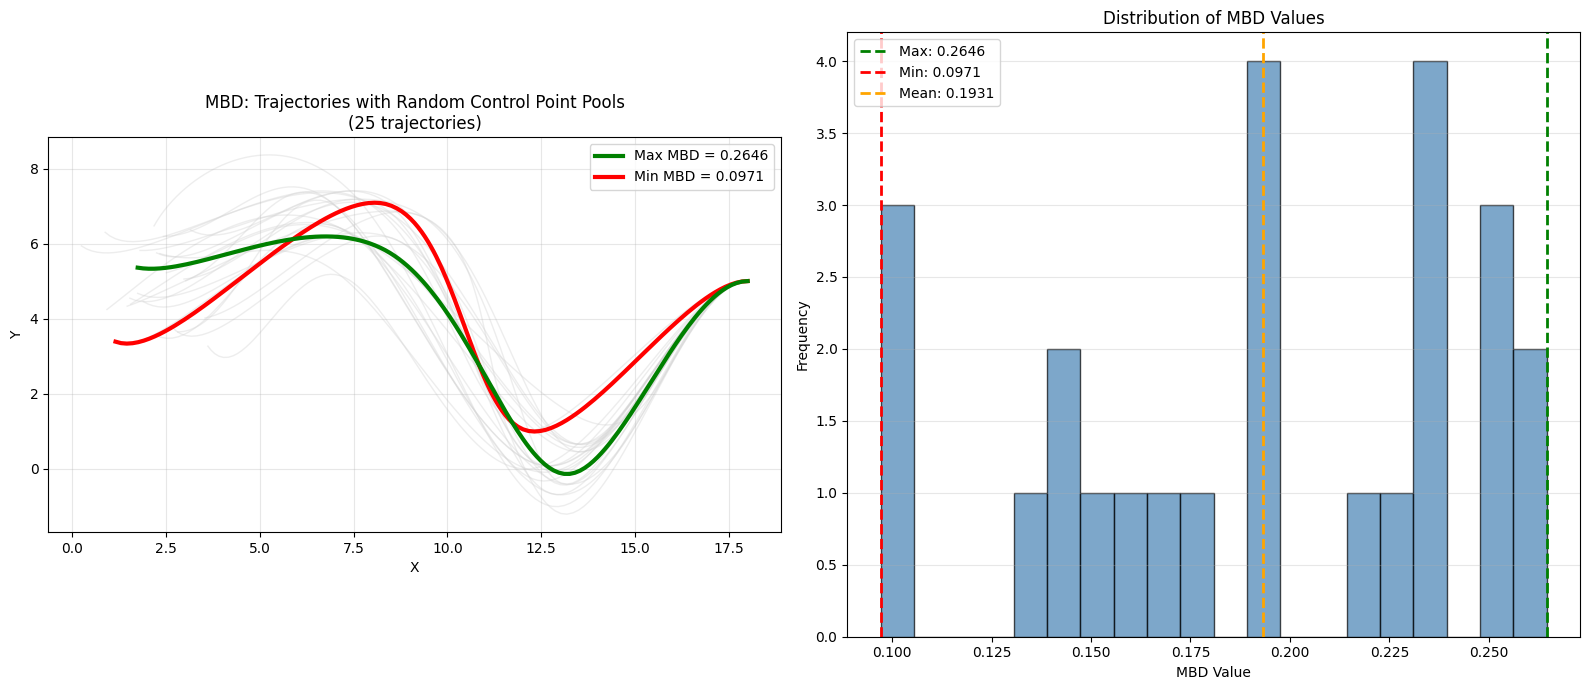


MBD Statistics:
Number of trajectories: 25
Mean MBD: 0.1931
Std MBD: 0.0515
Max MBD: 0.2646 (trajectory #22)
Min MBD: 0.0971 (trajectory #23)


In [63]:
# Visualizar resultados del análisis MBD para el segundo conjunto
idx_max_pool, idx_min_pool = plot_mbd_analysis(
    trajectories_pool_interp, 
    mbd_values_pool, 
    title="MBD: Trajectories with Random Control Point Pools"
)


## Análisis de Rankings MBD

Ordenamos las trayectorias por su MBD y seleccionamos las más centrales y periféricas.


Plot saved as: mbd_ranking_analysis.png


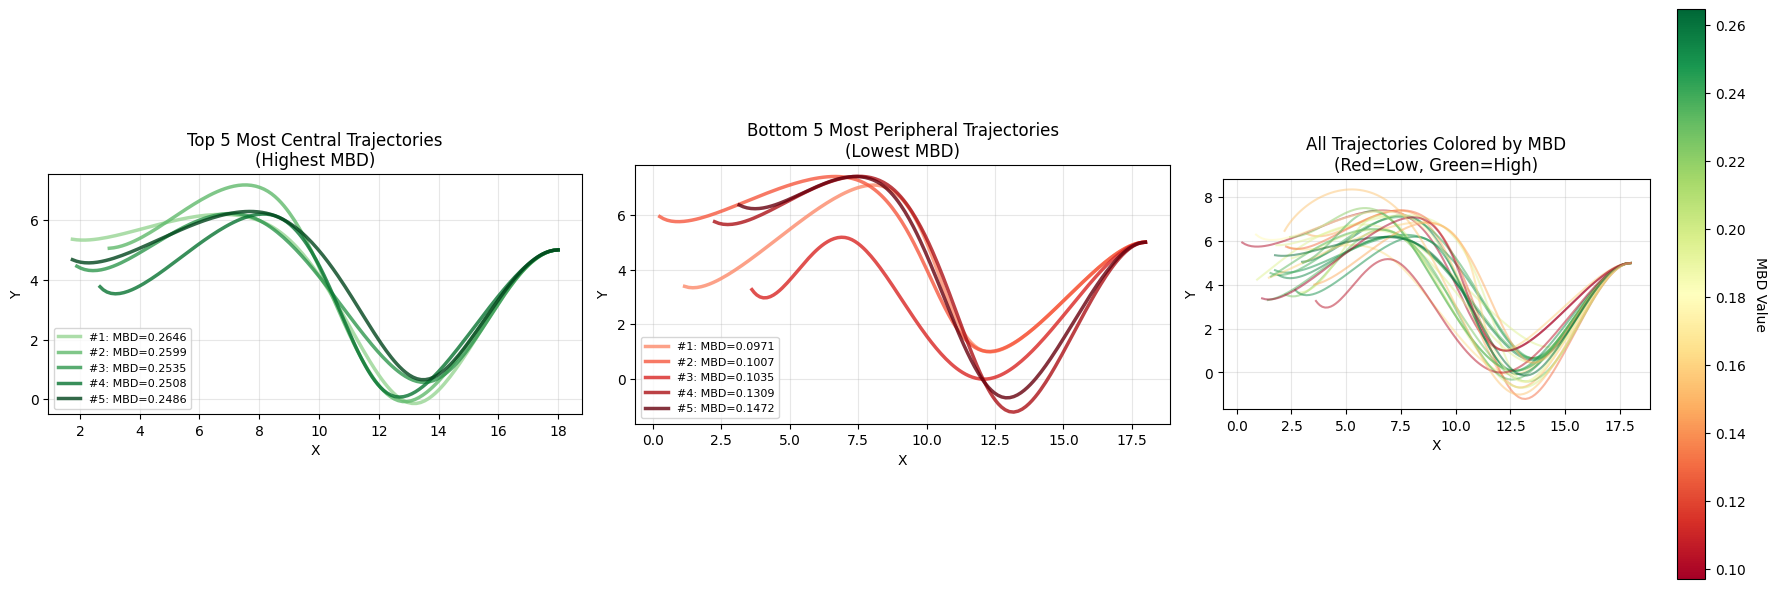


Top 5 Most Central Trajectories:
  Rank 1: Trajectory # 22 - MBD = 0.264556
  Rank 2: Trajectory #  4 - MBD = 0.259889
  Rank 3: Trajectory # 15 - MBD = 0.253533
  Rank 4: Trajectory # 14 - MBD = 0.250778
  Rank 5: Trajectory #  3 - MBD = 0.248622

Bottom 5 Most Peripheral Trajectories:
  Rank 1: Trajectory # 23 - MBD = 0.097067
  Rank 2: Trajectory #  0 - MBD = 0.100667
  Rank 3: Trajectory # 20 - MBD = 0.103467
  Rank 4: Trajectory #  9 - MBD = 0.130933
  Rank 5: Trajectory #  2 - MBD = 0.147178


In [64]:
def plot_mbd_ranking(trajectories, mbd_values, top_n=5, bottom_n=5, title="MBD Ranking"):
    """
    Visualiza las top-n trayectorias más centrales y bottom-n más periféricas.
    
    Parameters:
    - trajectories: lista de arrays de trayectorias
    - mbd_values: valores MBD
    - top_n: número de trayectorias más centrales a mostrar
    - bottom_n: número de trayectorias más periféricas a mostrar
    - title: título del gráfico
    """
    # Ordenar por MBD
    sorted_indices = np.argsort(mbd_values)[::-1]  # De mayor a menor
    
    # Crear figura
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Subplot 1: Top-n más centrales (mayor MBD)
    for i in range(min(top_n, len(trajectories))):
        idx = sorted_indices[i]
        traj = trajectories[idx]
        color = plt.cm.Greens(0.4 + 0.6 * (i / max(1, top_n - 1)))
        ax1.plot(traj[:, 0], traj[:, 1], linewidth=2.5, alpha=0.8,
                label=f'#{i+1}: MBD={mbd_values[idx]:.4f}', color=color)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'Top {top_n} Most Central Trajectories\n(Highest MBD)')
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8)
    
    # Subplot 2: Bottom-n más periféricas (menor MBD)
    for i in range(min(bottom_n, len(trajectories))):
        idx = sorted_indices[-(i+1)]
        traj = trajectories[idx]
        color = plt.cm.Reds(0.4 + 0.6 * (i / max(1, bottom_n - 1)))
        ax2.plot(traj[:, 0], traj[:, 1], linewidth=2.5, alpha=0.8,
                label=f'#{i+1}: MBD={mbd_values[idx]:.4f}', color=color)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f'Bottom {bottom_n} Most Peripheral Trajectories\n(Lowest MBD)')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8)
    
    # Subplot 3: Todas con ranking por color
    norm = plt.Normalize(vmin=np.min(mbd_values), vmax=np.max(mbd_values))
    cmap = plt.cm.RdYlGn  # Rojo = bajo MBD, Verde = alto MBD
    
    for i, traj in enumerate(trajectories):
        color = cmap(norm(mbd_values[i]))
        ax3.plot(traj[:, 0], traj[:, 1], linewidth=1.5, alpha=0.5, color=color)
    
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_title(f'All Trajectories Colored by MBD\n(Red=Low, Green=High)')
    ax3.set_aspect('equal')
    ax3.grid(True, alpha=0.3)
    
    # Añadir colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax3)
    cbar.set_label('MBD Value', rotation=270, labelpad=15)
    
    plt.tight_layout()
    
    # Guardar figura
    filename = 'mbd_ranking_analysis.png'
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved as: {filename}")
    plt.show()
    
    # Imprimir ranking
    print(f"\n{'='*60}")
    print(f"Top {top_n} Most Central Trajectories:")
    print(f"{'='*60}")
    for i in range(min(top_n, len(trajectories))):
        idx = sorted_indices[i]
        print(f"  Rank {i+1}: Trajectory #{idx:3d} - MBD = {mbd_values[idx]:.6f}")
    
    print(f"\n{'='*60}")
    print(f"Bottom {bottom_n} Most Peripheral Trajectories:")
    print(f"{'='*60}")
    for i in range(min(bottom_n, len(trajectories))):
        idx = sorted_indices[-(i+1)]
        print(f"  Rank {i+1}: Trajectory #{idx:3d} - MBD = {mbd_values[idx]:.6f}")
    print(f"{'='*60}")

# Aplicar ranking al segundo conjunto (con pools)
plot_mbd_ranking(
    trajectories_pool_interp, 
    mbd_values_pool, 
    top_n=5, 
    bottom_n=5,
    title="MBD Ranking Analysis"
)
